# deep learning:

![](video.gif)

                                                                          ~vqgan+clip

# las neuronas

<img src='https://upload.wikimedia.org/wikipedia/commons/3/30/Chemical_synapse_schema_cropped.jpg' width=400>

# "las neuronas"

![](https://i.stack.imgur.com/Ql0YP.png)

In [1]:
# definimos la neurona, recibe de input un vector (x1,x2,...,xn)
# usa los pesos W (w1,w2,...,wn)
import numpy as np

def f(x, w):
    
    # suma pesada
    # sumo cada par xn*wn y al final el bias 
    # eso es el producto interno o dot product en algebra
    wsum = np.dot(x,w[1:]) + w[0]
    
    # activacion, si la suma pesada supera cierto limite la funcion
    # tira un 1
    # si no, tira un 0
    
    if wsum >= 0.0:
        output=1
    else:
        output=0
    return output



In [4]:
import pandas as pd

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

data=pd.DataFrame(dataset,columns=['x1','x2','y'])
data.head()

,x1,x2,y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0


In [6]:
X=data[['x1','x2']]
y=data.y

In [8]:
# veamos como funciona si los pesos ya nos vienen definidos
# un peso por cada xn y un bias (3) 

weights = np.array([5, -91, 91])

# miro el output de mi neurona para cada fila
# comparo con la columna 'y' el target

for i,x in enumerate(X.values):
    prediction = f(x, weights)
    print("Target=%d, Prediccion=%d" % (y[i], prediction))

Target=0, Prediccion=0
Target=0, Prediccion=1
Target=0, Prediccion=1
Target=0, Prediccion=1
Target=0, Prediccion=0
Target=1, Prediccion=0
Target=1, Prediccion=0
Target=1, Prediccion=0
Target=1, Prediccion=0
Target=1, Prediccion=0


In [7]:
# veamos como funciona si los pesos ya nos vienen definidos
# un peso por cada xn y un bias (3) 

weights = np.array([-0.1, 0.20653640140000007, -0.23418117710000003])

# miro el output de mi neurona para cada fila
# comparo con la columna 'y' el target

for i,x in enumerate(X.values):
    prediction = f(x, weights)
    print("Target=%d, Prediccion=%d" % (y[i], prediction))

Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1


In [9]:
# Pero como obtengo los parametros/pesos y biases? 
# Como obtenia los betas/parametros de cualquier modelo?

# descenso gradiente!

def train_weights(x_train,y_train, l_rate, n_epoch):
    #inicio con w = 0,0...0
    weights = [0.0 for i in range(len(x_train[0])+1)]
    
    print('>epoch=-1, lrate=%.3f, error=inf,w0=%.3f, w1=%.3f, w2=%.3f' %(l_rate,weights[0], weights[1], weights[2])) 
    
    #itero
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        
        #predigo sobre las filas
        for i,x in enumerate(x_train):
            prediction = f(x, weights)
            
            # calculo la funcion de costo
            error = y_train[i] - prediction
            sum_error += error**2
            
            # defino los nuevos pesos en la direccion del gradiente
            # l_rate era la longuitud del paso en esa direccion
            
            weights[0] = weights[0] + l_rate * error
            for i in range(len(x)):
                weights[i + 1] = weights[i + 1] + l_rate * error * x[i]
                
        print('>epoch=%d, lrate=%.3f, error=%.3f, w0=%.3f, w1=%.3f, w2=%.3f' %
              (epoch, l_rate, sum_error, weights[0], weights[1], weights[2]))
    return weights

In [10]:
# ahora si, entrenemos nuestra neurona

l_rate = 0.1
n_epoch = 5

weights = train_weights(X.values,y, l_rate, n_epoch)


>epoch=-1, lrate=0.100, error=inf,w0=0.000, w1=0.000, w2=0.000
>epoch=0, lrate=0.100, error=2.000, w0=0.000, w1=0.485, w2=0.021
>epoch=1, lrate=0.100, error=1.000, w0=-0.100, w1=0.207, w2=-0.234
>epoch=2, lrate=0.100, error=0.000, w0=-0.100, w1=0.207, w2=-0.234
>epoch=3, lrate=0.100, error=0.000, w0=-0.100, w1=0.207, w2=-0.234
>epoch=4, lrate=0.100, error=0.000, w0=-0.100, w1=0.207, w2=-0.234


In [11]:
for i,x in enumerate(X.values):
    prediction = f(x, weights)
    print("Target=%d, Prediccion=%d" % (y[i], prediction))

Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=0, Prediccion=0
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1
Target=1, Prediccion=1


In [12]:
weights

[-0.1, 0.20653640140000007, -0.23418117710000003]

# Veamos como funciona

Tomemos un x (una fila)

In [14]:
x

array([7.67375647, 3.50856301])

In [15]:
f(x, weights)

1

# No es una regresion logistica con sombrero nuevo?

Un modelo que era una combinacion lineal de las features que tiraba 0 y 1....


# "la neurona"

![](https://i.stack.imgur.com/Ql0YP.png)

# Activacion

Que hace que no sea una simple combinacion lineal del input? 

## Nonlinear functions

* (a) Sigmoid function
* (b) Tanh function
* (c) ReLU function
* (d) Leaky ReLU function.

> Se puede demostrar que sin la no linealidad de la funcion de activacion, cualquier red neuronal por mas compleja que sea se puede reducir a una red de una sola capa con coeficientes lineales. 

# Funciones de activacion

Ejemplos unidimensionales:

![](https://www.researchgate.net/publication/323617663/figure/fig3/AS:667846732423172@1536238477220/Nonlinear-function-a-Sigmoid-function-b-Tanh-function-c-ReLU-function-d-Leaky.png)

# Resumiendo:

Una red neuronal solo es una combinacion sucesiva de transformaciones lineales y no lineales que nos sirven para separar datos en espacios de alta dimensionalidad.

![](nn.gif)

[video](https://youtu.be/CfAL_cL3SGQ?t=288)

# Por que Deep Learning? 

* En teoria una red neuronal de una sola capa con muchas neuronas, podria aproximar cualquier funcion, pero es mas eficiente entrenar una red de varias capaz de tamaño reducido.

* Como controlamos la complejidad (capacidad de aprendizaje) de una red?

    * Numero de Neuronas (width).
    * Numero de Layers (depth).

<div>
<img src="2.png" width="400"/>
</div>

```
...Theoretical results strongly suggest that in order to learn the kind of complicated functions that can represent high-level abstractions (e.g. in vision, language, and other AI-level tasks), one needs deep architectures. Deep architectures are composed of multiple levels of non-linear operations, such as in neural nets
with many hidden layers...
``` 
                    - Yoshua Bengio (2009), "Learning Deep Architectures for AI"

## Hubel & Wiesel (1962)

Estudio en gatos sobre la percepcion visual, concluyen que es jerarquica.

![](11.png)

* Deeper redes permiten usar menos parametros, las shallow redes no son buenas para abstraer conocimiento (reducir la dimensionalidad) https://arxiv.org/pdf/1312.6098.pdf

![](https://www.researchgate.net/profile/Yali-Nie/publication/326531654/figure/fig17/AS:650654590717968@1532139551523/Layers-and-their-abstraction-in-deep-learning-Image-recognition-as-measured-by-ImageNet.png)

* Relational and semantic knowledge can be obtained at higher levels of abstraction and representation of the raw data (Yoshua Bengio and Yann LeCun, Scaling Learning Algorithms towards AI, 2007).

* Deep architectures can be representationally efficient. This sounds contradictory, but its a great benefit because of the distributed representation power by deep learning.

* The learning capacity of deep learning algorithms is proportional to the size of data, that is, performance increases as the input data increases, whereas, for shallow or traditional learning algorithms, the performance reaches a plateau after a certain amount of data is provided as shown in the following figure, Learning capability of deep learning versus traditional machine learning:


![](https://cdn-images-1.medium.com/max/1600/0*GTzatEUd4cICPVub.)

![](3.png)

![](4.png)

![](5.png)

#  Como encuentro los betas?

Como siempre...minimizo la funcion de costo. Si quiero entrenar mi red para clasificar perro/gato uso las mismas metricas de la toda la vida para ajustar los betas de la ultima capa que decide si es perro o gato. Derivo la funcion de costo... funcion que depende de los betas de la ultima capa, la anterior, la antepenultima y asi...

## Backpropagation es solo la regla de la cadena*

![](7.png)

[facil](https://theorydish.blog/2021/12/16/backpropagation-≠-chain-rule/)
[dificil](https://timvieira.github.io/blog/post/2017/08/18/backprop-is-not-just-the-chain-rule/)

Pero una red neuronal tiene una forma analitica cerrada que podemos derivar?

Veamos que pinta tiene una funcion de costo:

<img src="6.png" width="500"/>

# Optimizadores

Como vimos en el curso para buscar el minimo de la funcion de costo no derivamos, iteramos (epochs) con pasitos cortos (learning rate) en la direccion de mayor pendiente en busqueda del minimo.

### Adaptative Learning Rates

Algoritmos que van regulando el learning rate para optimizar la busqueda.

### Batched Stochastic Gradient Descent

SGD de siempre calculado en pedazos (batches) random del training set.

# Regularizacion (evitando el overfitting)


## Data augmentation

Se perturban los datos para evitar el overfiting (la misma foto del perrito, rotada, flipeada, cropeada, etc)

## Dropout

De manera aleatoria matamos neuronas con una birrita en cada iteracion, obligamos a que todas las neuronas aprendan. Esto hace que la red sea robusta y que pueda generalizar. 

## Early Stopping

Dejamos de iterar cuando en un set de cross validation empezamos a performar mal.

https://blog.ml.cmu.edu/2020/08/31/4-overfitting/

https://www.youtube.com/watch?v=Kih-VPHL3gA

# Redes Multicapa


Veamos un ejemplo de como construir una red neuronal para el dataset de los digitos escritos a mano:


![](https://camo.githubusercontent.com/e72b6f47eb9d50f9c444e38e5eba02d3f630996554bf4df767bd01b62032fad7/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313339312f312a37486d534a4f41425463527a574d564f4233664a6c412e706e67)

 El objetivo es una funcion (red neuronal) que tome como input la imagen de un numero (por ejemplo el 8) y su output un vector de 10 dimensiones con las probabilidades de pertenencia a cada clase. 
 
 
<img src="https://user-images.githubusercontent.com/68801296/88917938-4008f180-d286-11ea-8667-50027700e3ea.png" width="400"/>

In [17]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

# activaciones
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(x, 0)
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2
def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2
def relu_prime(x):
    return np.array(x >= 0).astype('int')

# errores
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))
def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size
def sse_prime(y_true, y_pred):
    return y_pred - y_true



# importamos los datos

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

# Estructura de la Red

```
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 20),
    ActivationLayer(relu, relu_prime),
    FCLayer(20, 10),
    SoftmaxLayer(10)
]
```


+ 28*28 pixeles tienen las imagenes, la primer capa vectoriza las imagenes
+ la segunda capa tiene 20 'neuronas' (20 combinaciones lineales de las 28*28 variables)
+ la capa de activacion donde meto la no linealidad
+ una tercer capa que conecta 20 neuronas con las 10 neuronas finales (una por cada clase)
+ la ultima capa solo se encarga de normalizar la salida para obtener las probabilidades

Vamos a definir cada capa como una clase, una clase era una 'funcion' que podia tener funciones y variables embebidas. Durante todo el curso usamos objetos clase cuando usabamos un modelo, `modelo.fit`, etc.


In [ ]:
# reshapea el input
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))

    
# capa fully conected

class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias



In [ ]:
    
# activacion (no linealidad)

class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    

    
# reshapea el output, normaliza sobre la cantidad de clases
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output


# Y el descenso grandiente?

In [18]:
# reshapea el input
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)
    
# capa fully conected

class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error 

In [19]:
    
# activacion (no linealidad)

class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)
    
# reshapea el output, normaliza sobre la cantidad de clases
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [20]:
# importamos los datos

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

In [ ]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 10),
    SoftmaxLayer(10)
]

In [ ]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 10),
    ActivationLayer(relu, relu_prime),
    SoftmaxLayer(10)
]

In [21]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 20),
    ActivationLayer(relu, relu_prime),
    FCLayer(20, 10),
    SoftmaxLayer(10)
]

In [22]:
def train(network,x_train, y_train, epochs=40,learning_rate=0.1):
    err=[]
    # training
    for epoch in range(epochs):
        error = 0
        for x, y_true in zip(x_train, y_train):
            # forward
            output = x
            for layer in network:
                output = layer.forward(output)

            # error (display purpose only)
            error += mse(y_true, output)

            # backward
            output_error = mse_prime(y_true, output)
            for layer in reversed(network):
                output_error = layer.backward(output_error, learning_rate)

        error /= len(x_train)
        err.append(error)
    return(network,err)

def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

In [23]:
network,err=train(network,x_train,y_train)

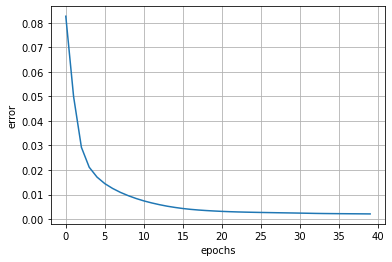

In [24]:
plt.plot(err)
plt.grid(True)
plt.ylabel('error')
plt.xlabel('epochs')
plt.show()

In [26]:
# veamos la performance en el set de testeo

accuracy = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('accuracy: %.4f' % accuracy)
print('mse: %.4f' % error)

accuracy: 0.8592
mse: 0.0214


# Hay que hacer todo eso a mano? 

# TensorFlow

Libreria de google para redes neuronales, antiguamente se usaba una libreria aparte llamada KERAS para armar las redes, hoy keras esta incluida en TF.

Esta es la arquitectura de nuestra red:

```
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 20),
    ActivationLayer(relu, relu_prime),
    FCLayer(20, 10),
    SoftmaxLayer(10)
]
```

Como implementamos esto en Tf?

In [30]:
import tensorflow as tf
import tensorflow.keras as ks

In [31]:
model = ks.models.Sequential()
 
model.add(ks.layers.Flatten(input_shape=(28, 28)))
model.add(ks.layers.Dense(20,activation=tf.nn.relu))
model.add(ks.layers.Dense(20,activation=tf.nn.relu))
model.add(ks.layers.Dense(10,activation=tf.nn.softmax))
 
model.compile(
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

Metal device set to: Apple M1


2022-01-05 11:49:59.680588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-05 11:49:59.681753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [32]:
model.fit(x_train,y_train,epochs=10);

2022-01-05 11:50:09.582022: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-05 11:50:09.585347: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-05 11:50:09.732770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
32/32 [==============================] - 0s 6ms/step - loss: 2.0896 - accuracy: 0.3070
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 1.6577 - accuracy: 0.5780
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 1.2963 - accuracy: 0.7120
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.9988 - accuracy: 0.7720
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7726 - accuracy: 0.8220
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6278 - accuracy: 0.8490
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5279 - accuracy: 0.8650
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4518 - accuracy: 0.8850
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 0.3957 - accuracy: 0.8950
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 0.3547 - accuracy: 0.9070


# Veamos como nos fue en el test:

In [33]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

 37/313 [==>...........................] - ETA: 1s - loss: 0.6280 - accuracy: 0.8041

2022-01-05 11:50:39.785266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.5606 - accuracy: 0.8291
loss->  0.5605828166007996 
acc->  0.8291000127792358


## Miremos una sola prediccion:

In [38]:
predictions=model.predict([x_test])
predictions[0]

2022-01-05 13:28:45.429811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([6.1261046e-05, 4.9726212e-05, 5.9080147e-04, 4.1295623e-04,
       1.6288496e-04, 1.8081400e-05, 3.3151041e-04, 9.9380589e-01,
       1.1645434e-04, 4.4504441e-03], dtype=float32)

In [28]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [29]:
print('label -> ',np.argmax(y_test[2]))
print('prediction -> ',np.argmax(predictions[2]))

label ->  1
prediction ->  1


In [27]:
print('label -> ',np.argmax(y_test[20]))
print('prediction -> ',np.argmax(predictions[20]))

label ->  9
prediction ->  9


In [42]:
errores=[]
aciertos=[]
for i,img in enumerate(y_test):
    gt=np.argmax(y_test[i])
    ypred=np.argmax(predictions[i])
    if gt == ypred:
        aciertos.append(i)
    else:
        errores.append(i)

In [107]:
from random import sample


def plot(lista):
    fig, axs = plt.subplots(2,4,figsize=(13,8))
    for j,ax in enumerate(axs.flat):
        i=lista[j]
        image = x_test[i]
        ax.imshow(image, cmap='binary')
        pred=model.predict([x_test[i].reshape(1,-1)])[0]
        idx = np.argmax(pred)
        ax.text(0.5,2.5,'pred: %s, prob: %.3f' % (idx, pred[idx]))

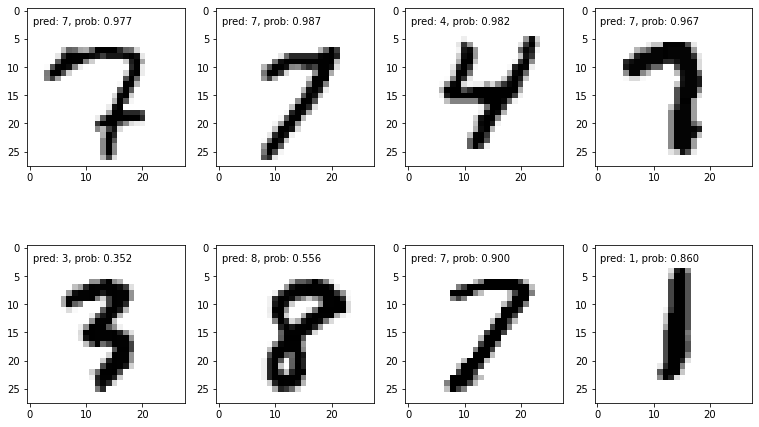

In [105]:
plot(sample(aciertos,12))


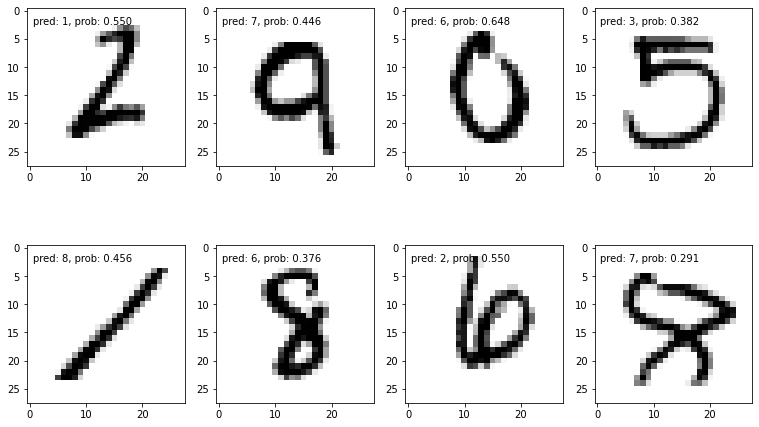

In [106]:
plot(sample(errores,12))

## Cuando usar deep learning? tiramos todo lo que aprendimos en el curso?

Miremos la performance de una NN en uno de los dataset que usamos en el curso, como el de 'hitter.csv' si, ese, malisimo! Ya se, pero bueno es uno de los que mas usamos (263 jugadores, 19 variables)

Ajustamos esos datos con una regresion lineal, lasso y una NN. Aca los resultados:

![](0.png)

No solo no performo mejor que una regresion comun, si no que ademas tiene 1.4k parametros!

https://lilianweng.github.io/lil-log/2019/03/14/are-deep-neural-networks-dramatically-overfitted.html

# Donde si usar deep learning:


![](https://cdn-images-1.medium.com/max/1600/0*GTzatEUd4cICPVub.)


# Algunas aplicaciones:

+ cv (img+video) 
+ generative learning
+ nlp 
+ audio
+ reinforcement learning (rl)


# cv

- https://cv.gluon.ai/
- https://opencv.org/

### Image Classification:

<img  src="https://github.com/dmlc/gluon-cv/raw/master/docs/_static/image-classification.png" alt="classification" width="400"/> 


### Object Detection: 

detect multiple objects with their bounding boxes in an image.     

<img src="https://github.com/dmlc/gluon-cv/raw/master/docs/_static/object-detection.png" alt="detection" width="500"/>

<img src="https://pythonawesome.com/content/images/2021/07/track_all.gif" alt="detection" width="500"/> 

### Semantic Segmentation: 

associate each pixel of an image  with a categorical label. 

<img src="https://github.com/dmlc/gluon-cv/raw/master/docs/_static/semantic-segmentation.png" alt="instance" width="500"/>

### Instance Segmentation: 

detect objects and associate  each pixel inside object area with an instance label. 

<img src="https://github.com/dmlc/gluon-cv/raw/master/docs/_static/instance-segmentation.png" alt="instance" width="500"/>

### Pose Estimation: 

detect human pose from images. 

<img src="https://mihaifieraru.github.io/publication/fieraru_2018_cvpr_workshops/featured.png" width='500'/> 

### Video Action Recognition: 

recognize human actions in a video. 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTu5NNTdHkfoc0IcxQ8jxlxc_Dzp_Fh49lG0pPx3yz-jBvDTs55vShVZZi8bg__8xjZYWo&usqp=CAU" alt="action_recognition" width="500"/>


### Depth Prediction: 

predict depth map from images.

<img src="https://github.com/dmlc/gluon-cv/raw/master/docs/_static/depth.png" alt="depth" width="500"/>

## Person Re-ID:

re-identify pedestrians across scenes 

<img  src="https://user-images.githubusercontent.com/3307514/46702937-f4311800-cbd9-11e8-8eeb-c945ec5643fb.png" alt="re-id" width="500"/>

### Superesolution y superfluidez

<img  src="https://github.com/thunil/TecoGAN/raw/master/resources/tecoGAN-spider.gif" alt="re-id" width="500"/> 



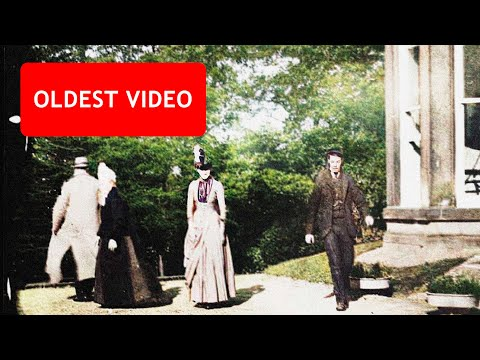

In [12]:
YouTubeVideo('Fxd8XJ_J0Gc', width=720, height=405)

# generative deep learning

![](generative.png)

![](gedl_0102.png)

![](gedl_0101.png)

![](https://www.oreilly.com/library/view/generative-deep-learning/9781492041931/assets/gedl_0103.png)


https://thispersondoesnotexist.com

## GANs 

<img src="https://www.notion.so/image/https%3A%2F%2Fmiro.medium.com%2Fmax%2F900%2F1*TKr1dtcNgJCA8uYY1OhmSg.png?table=block&id=b9eebb0f-5bd3-4b1e-aeb4-608e7a62087d&spaceId=84b18300-e319-4c7a-8169-90443709290a&width=2000&userId=&cache=v2" width="600" />

In [1]:
YouTubeVideo('cQ54GDm1eL0', width=720, height=405)

NameError: name 'YouTubeVideo' is not defined

## deepfakes

<img src="https://www.researchgate.net/profile/Ali-Javed/publication/349703826/figure/fig2/AS:996746314412033@1614654248932/Creation-of-a-Deepfake-using-an-auto-encoder-and-decoder-The-same-encoder-decoder-pair.png" width="500" />

In [10]:
YouTubeVideo('HG_NZpkttXE?t=99', width=720, height=405)

# nlp

![](https://pythondiario.com/wp-content/uploads/2021/08/1_copilot.gif)

![](https://prototypr.gumlet.io/wp-content/uploads/2020/07/2020-07-22-14-39-08.2020-07-22-14_40_46.gif?format=webp&w=2400)

## Autoregex


https://www.autoregex.xyz

```
Mandatory single name, WITHOUT spaces, WITH special characters
>> ^[a-zA-Z0-9!@#$%^&*()_+-=[]{};':"\|,.<>/?]+$




Match all characters before the sequence "xyz" (do not include "xyz")
>> [^xyz]*[^i*&2@]

>> This regular expression matches any character that is not an asterisk, an ampersand, the number 2, or the at sign.
```



### text summarization

![](https://konfuzio.com/wp-content/uploads/2021/02/summarize_annual_report.gif)

# img+nlp (dalle-2)


<img src='8.png' width=600/>

<img src='https://pbs.twimg.com/media/FYctmPAXgAE8dJq?format=jpg&name=900x900' width=500 >



<img src='https://pbs.twimg.com/media/FVT2wSCXwAIRMhB?format=png&name=small' width=500 >

### dall-e

`input: 'deep learning'`

![](video.gif)

                                                                                    ~vqgan+clip


In [1]:
from IPython.display import YouTubeVideo

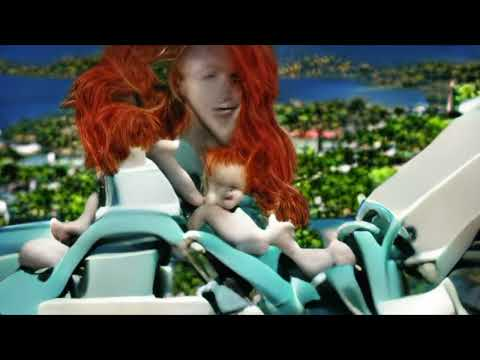

In [8]:
YouTubeVideo('VNrmG4EvFs8', width=720, height=405)

# audio

https://openai.com/blog/jukebox/

https://fakeyou.com
https://fakeyou.com/tts/result/TR:aykxb3fa2vcgnr13mnyfy5ksjgcag

Usando solo 5 segundos de entrenamiento!

https://www.youtube.com/watch?v=0sR1rU3gLzQ

https://app.resemble.ai/voices

https://www.lalal.ai

# reinforcement learning

![](https://www.mathworks.com/discovery/reinforcement-learning/_jcr_content/mainParsys3/discoverysubsection/mainParsys/image.adapt.full.medium.png/1615456679034.png)




![](https://www.researchgate.net/profile/Akos-Kungl-2/publication/342097480/figure/fig4/AS:901194046271488@1591872812012/Problem-setup-in-reinforcement-learning-A-The-two-main-components-of-reinforcement.png)







![](https://i.imgur.com/kdYU907.gif)


https://www.youtube.com/watch?v=hx_bgoTF7bs


https://www.youtube.com/watch?v=jjfDO2pWpys&t=378s

# Links 
---

## nlp

[Transformers! Attention Is All You Need](https://arxiv.org/abs/1706.03762)

[GPT-2 ilustrado](https://jalammar.github.io/illustrated-gpt2/)

http://nlpprogress.com/

https://huggingface.co/models

# Links 
---

## nlp+cv

https://openai.com/blog/image-gpt/

https://openai.com/blog/dall-e/

                                                                                    
[vqgan+clip colab](https://colab.research.google.com/github/justinjohn0306/VQGAN-CLIP/blob/main/VQGAN%2BCLIP_%28z%2Bquantize_method_with_augmentations%2C_user_friendly_interface%29.ipynb)                                                                                  

## reinforcement learning

[intro colab](https://colab.research.google.com/drive/1YZY9HdB9BkCtJQ4Xm6w4Uxmd-HLOEUJq)

# Links 
---

## cursos

[mit](http://introtodeeplearning.com/2021/index.html)

## libros

chollet

https://drive.google.com/file/d/1srh7IVkxiTkyJug7qG25w5CETYKn-T_1/view?usp=sharing

[goodfellow/bengio](https://www.deeplearningbook.org)

## youtubes

[dotcsv](https://www.youtube.com/c/DotCSV)

[2minpapers](https://www.youtube.com/c/KárolyZsolnai)

# Links 
---

## papers+code

[paperswithcode](https://paperswithcode.com)

